<a href="https://colab.research.google.com/github/sechanssi/python/blob/main/%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Python3 샘플 코드 #


import requests

url = 'http://apis.data.go.kr/1480523/MetalMeasuringResultService/MetalService'
params ={'serviceKey' : 'pWO+NrKF1S9iCNbq16umtPo8D8V85pQvymIOURFnaDI0A2DvB1K/kEodruAkTBWr79LCOMHIc4kIkaYdJg/CQg==', 'pageNo' : '1', 'numOfRows' : '990', 'resultType' : 'JSON', 'date' : '20171208', 'stationcode' : '1', 'itemcode' : '90303', 'timecode' : 'RH02' }

res = requests.get(url, params=params)
print(res.content)


b'{"MetalService":{"header":{"code":"00","message":"NORMAL SERVICE"},"item":[{"SDATE":"20171208000000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":24.125},{"SDATE":"20171208020000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":26.973},{"SDATE":"20171208040000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":25.986},{"SDATE":"20171208060000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":23.7435},{"SDATE":"20171208080000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":22.9215},{"SDATE":"20171208100000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":21.729},{"SDATE":"20171208120000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":17.606},{"SDATE":"20171208140000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":12.102},{"SDATE":"20171208160000","STATIONCODE":1,"ITEMCODE":"90303","TIMECODE":"RH02","VALUE":10.046},{"SDATE":"20171208180000","STATIONCODE":1,"ITEMCODE":"90303","TIME

In [67]:
import json
json_file = json.loads(res.text)

In [68]:
import pandas as pd
from pandas import json_normalize
df = json_normalize(json_file['MetalService']['item'])
df

,SDATE,STATIONCODE,ITEMCODE,TIMECODE,VALUE
0,20171208000000,1,90303,RH02,24.1250
1,20171208020000,1,90303,RH02,26.9730
2,20171208040000,1,90303,RH02,25.9860
3,20171208060000,1,90303,RH02,23.7435
4,20171208080000,1,90303,RH02,22.9215
5,20171208100000,1,90303,RH02,21.7290
6,20171208120000,1,90303,RH02,17.6060
7,20171208140000,1,90303,RH02,12.1020
8,20171208160000,1,90303,RH02,10.0460
9,20171208180000,1,90303,RH02,8.5985


# 시각화

In [73]:
#한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [45]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

Text(0.5, 1.0, '2017년 12월 8일 미세먼지 (금속성분) 농도 데이터')

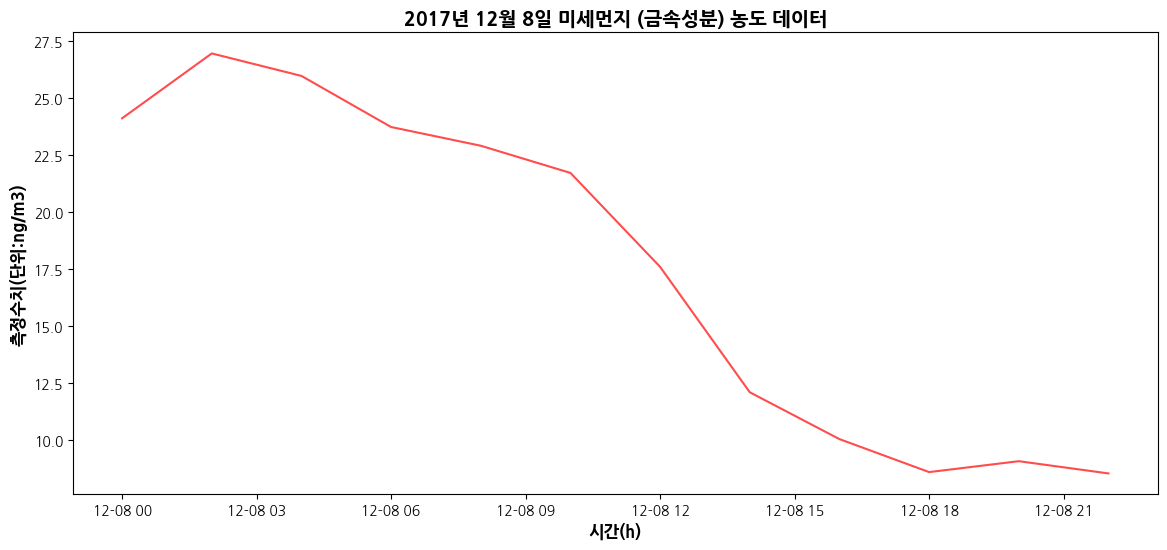

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc("font",family="NanumGothic")
mpl.rcParams['axes.unicode_minus'] = False

df['SDATE'] = pd.to_datetime(df['SDATE'])
df['VALUE'] = pd.to_numeric(df['VALUE'], downcast= 'float')
fig = plt.figure(figsize=(14,6))

ax = plt.subplot(1,1,1)
ax.plot(df['SDATE'],df['VALUE'],color='r',lw=1.5,alpha=0.7)
ax.set_ylabel('측정수치(단위:ng/m3)', fontweight='bold',fontsize=12)
ax.set_xlabel('시간(h)', fontweight='bold',fontsize=12)
ax.set_title('2017년 12월 8일 미세먼지 (금속성분) 농도 데이터',fontweight='bold',fontsize=14)